In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

#Import Data

In [2]:
base_path = "/content/kidney_disease.csv"
df = pd.read_csv(base_path)

#Exploratory Data Analysis (EDA) and Data Preprocessing

In [3]:
df.shape

(400, 26)

In [4]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
df.head(20)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Handling Missing Values

In [8]:
df.isnull().sum().sort_values(ascending=True)

,0
id,0
classification,0
pe,1
appet,1
ane,1
cad,2
dm,2
htn,2
pcc,4
ba,4


In [9]:
# Convert pcv , wc and rc to numerical type

df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [10]:
# Identify all columns in the DataFrame 'df_orig' that have data type 'object' (usually indicates categorical data)
cat_col = [col for col in df.columns if df[col].dtype == 'object']

# Loop through each identified categorical column
for col in cat_col:
    # Print the column name and its unique values
    print('{} has {} values '.format(col, df[col].unique()))
    print('\n')


rbc has [nan 'normal' 'abnormal'] values 


pc has ['normal' 'abnormal' nan] values 


pcc has ['notpresent' 'present' nan] values 


ba has ['notpresent' 'present' nan] values 


htn has ['yes' 'no' nan] values 


dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


cad has ['no' 'yes' '\tno' nan] values 


appet has ['good' 'poor' nan] values 


pe has ['no' 'yes' nan] values 


ane has ['no' 'yes' nan] values 


classification has ['ckd' 'ckd\t' 'notckd'] values 




In [11]:
# Replace inconsistent values in the 'diabetes_mellitus' column
# '\tno' -> 'no', '\tyes' -> 'yes', and ' yes' (with a leading space) -> 'yes'
df['dm'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)

# Replace the inconsistent value '\tno' with 'no' in the 'coronary_artery_disease' column
df['cad'] = df['cad'].replace(to_replace='\tno', value='no')

# Replace the inconsistent value 'ckd\t' (with a trailing tab) with 'ckd' in the 'classification' column
df['classification'] = df['classification'].replace(to_replace='ckd\t', value='ckd')

# Replace the inconsistent value 'notckd' with 'not ckd' (adding a space for clarity) in the 'classification' column
df['classification'] = df['classification'].replace(to_replace='notckd', value='not ckd')

# Loop through each categorical column in 'cat_col' and print its unique values
for col in cat_col:
    print('{} has {} values '.format(col, df[col].unique()))
    print('\n')


rbc has [nan 'normal' 'abnormal'] values 


pc has ['normal' 'abnormal' nan] values 


pcc has ['notpresent' 'present' nan] values 


ba has ['notpresent' 'present' nan] values 


htn has ['yes' 'no' nan] values 


dm has ['yes' 'no' nan] values 


cad has ['no' 'yes' nan] values 


appet has ['good' 'poor' nan] values 


pe has ['no' 'yes' nan] values 


ane has ['no' 'yes' nan] values 


classification has ['ckd' 'not ckd'] values 




<ipython-input-11-5fbd03ee0f38>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dm'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)


In [12]:
# Map the values in the 'classification' column to numerical values: 'ckd' to 0 and 'not ckd' to 1
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})

# Convert the 'classification' column to a numeric data type, coercing any errors to NaN (in case there are any unexpected values)
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

# Display the data type of the 'class' column to confirm the conversion
print("Data type of 'class' column:", df['classification'].dtype)


Data type of 'class' column: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [14]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' nan] values

cad has ['no' 'yes' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values



In [15]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols = num_cols[:-1] # Excluding Classification column
print(cat_cols)
print(num_cols)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


#Replace NaN values
Use KNNImputer to replace nan values:

In [16]:
from sklearn.impute import KNNImputer

df_clean = df

# Initialize KNNImputer for numerical columns
imputer = KNNImputer(n_neighbors=11)
# Step 1: Impute missing values for numerical columns using KNNImputer
df_clean[num_cols]=imputer.fit_transform(df_clean[num_cols])

# Step 2: Define a function to impute missing values in categorical columns with the mode
def impute_mode(feature):
    mode = df_clean[feature].mode()[0]
    df_clean[feature] = df_clean[feature].fillna(mode)

# Step 3: Apply mode imputation for each categorical column
for col in cat_cols:
    impute_mode(col)

In [17]:
df_clean.isnull().sum().sort_values(ascending=True)

,0
id,0
pe,0
appet,0
cad,0
dm,0
htn,0
rc,0
wc,0
pcv,0
hemo,0


In [18]:
#Exploring Unique Values in Columns

for i in df_clean.columns:
  print("*****************" , i ,"******************")
  print()
  print(set(df[i].tolist()))
  print()

***************** id ******************

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.

#Check the Distribution of Classes (Target Variable)


In [19]:
from sklearn.metrics import log_loss
import numpy as np

# Calculate Gini Index
class_distribution = df_clean['classification'].value_counts(normalize=True)
gini_index = 1 - sum(np.square(class_distribution))
print(f'Gini Index: {gini_index}')

Gini Index: 0.46875


In [20]:
# Calculate the ratio of the classes
majority_class_count = class_distribution.max()
minority_class_count = class_distribution.min()

# Calculate the difference
imbalance_difference = majority_class_count - minority_class_count

print(f'Majority Class Count: {majority_class_count}')
print(f'Minority Class Count: {minority_class_count}')
print(f'Difference (imbalance): {imbalance_difference}')

Majority Class Count: 0.625
Minority Class Count: 0.375
Difference (imbalance): 0.25


#Encoding Categorical Data Using LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder

encode_data = df_clean.apply(LabelEncoder().fit_transform)

# Display the encoded data (numerical values for categorical features)
encode_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,43,10,29,10,0,1,1,0,0,...,86,47,127,1,1,0,0,0,0,0
1,1,5,0,29,26,0,1,1,0,0,...,66,19,83,0,0,0,0,0,0,0
2,2,63,10,1,20,16,1,1,0,0,...,26,39,63,0,1,0,1,0,1,0
3,3,43,3,0,26,0,1,0,1,0,...,33,25,40,1,0,0,1,1,1,0
4,4,47,10,1,20,0,1,1,0,0,...,51,35,103,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55,10,29,0,0,1,1,0,0,...,90,25,114,0,0,0,0,0,0,1
396,396,35,3,32,0,0,1,1,0,0,...,98,47,144,0,0,0,0,0,0,1
397,397,8,10,29,0,0,1,1,0,0,...,93,24,136,0,0,0,0,0,0,1
398,398,11,1,32,0,0,1,1,0,0,...,95,33,141,0,0,0,0,0,0,1


<Axes: >

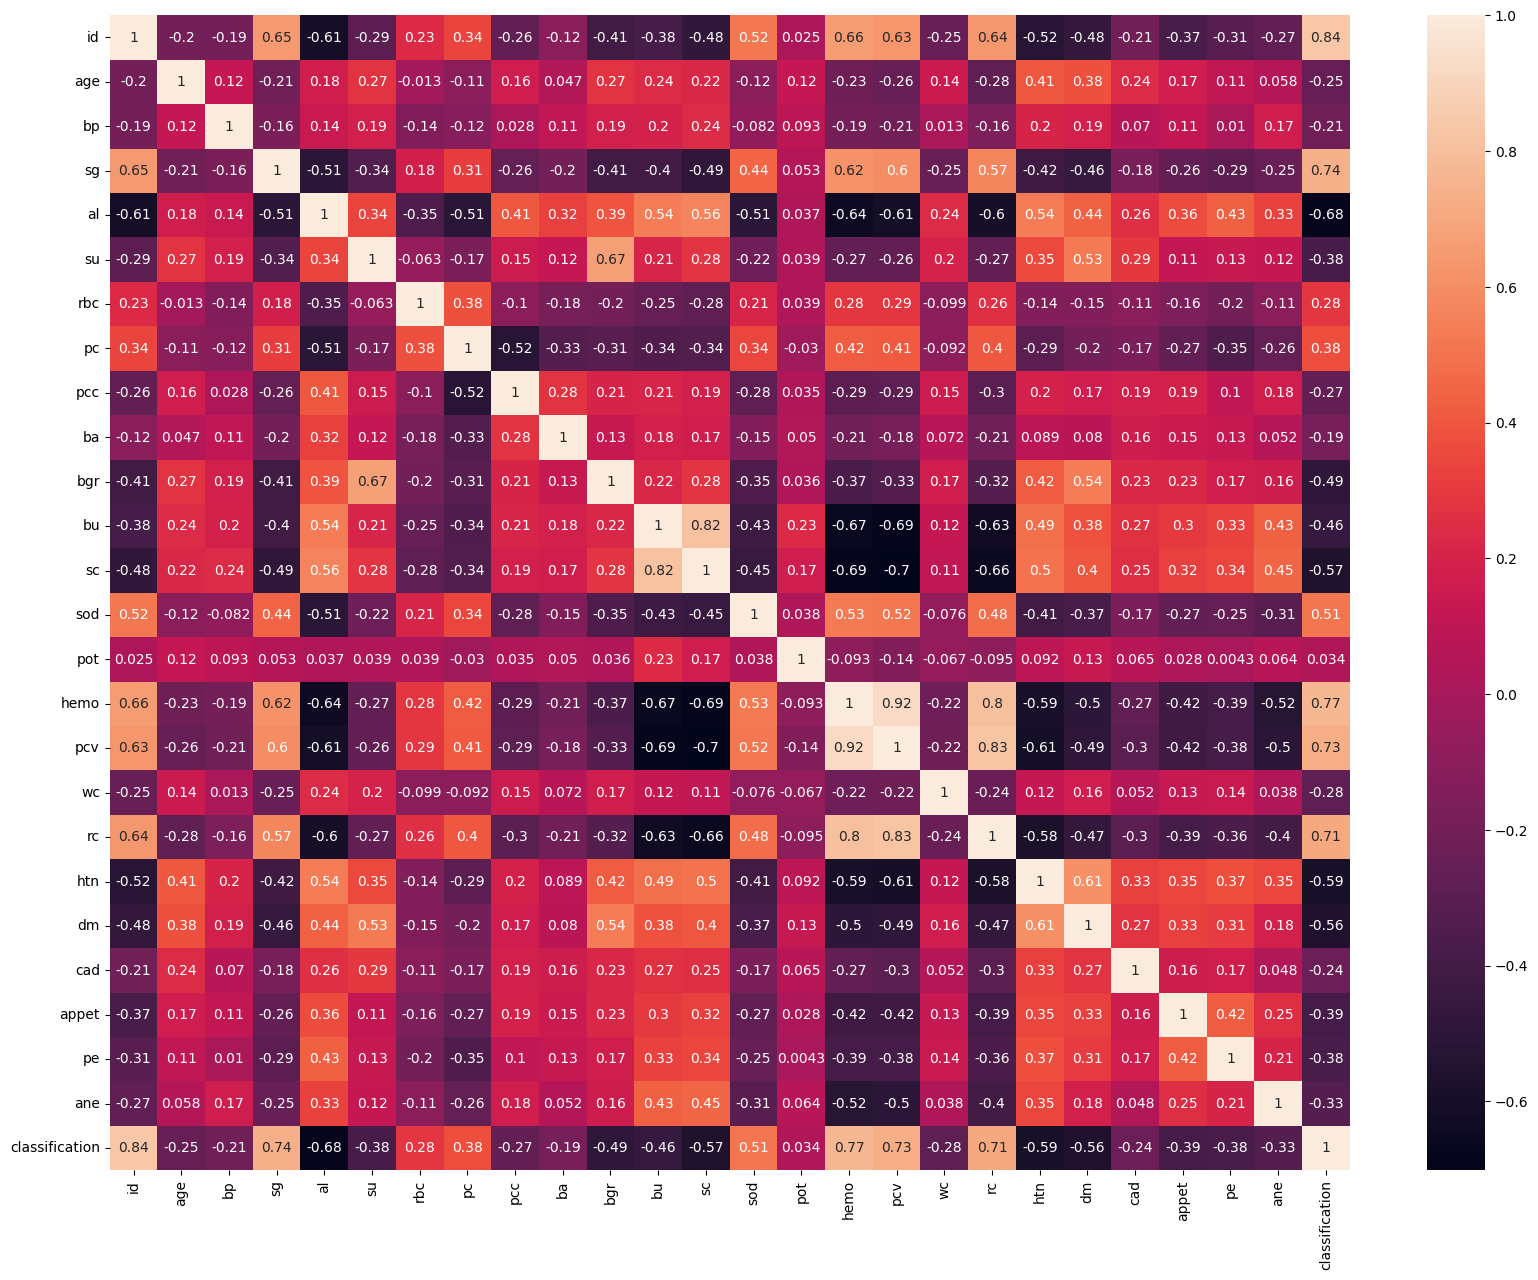

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
corr = encode_data.corr()
sns.heatmap(corr, annot = True)

In [23]:
# Splitting features and target
X = encode_data.drop(['id', 'classification'], axis=1)
y = encode_data['classification']

# Handle Imbalanced Data


In [24]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [25]:
print(Counter(y))

Counter({0: 250, 1: 150})


In [26]:
ros=RandomOverSampler()
X_ros, y_ros=ros.fit_resample(X, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


# Scale the features

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X_ros)
y=y_ros

In [ ]:
y

,classification
0,0
1,0
2,0
3,0
4,0
...,...
495,1
496,1
497,1
498,1


#Dimentionaly Reduction

In [28]:
from sklearn.decomposition import PCA

pca=PCA(.95)
X_PCA=pca.fit_transform(X_scaled)

In [29]:
print(X.shape)
print(X_PCA.shape)

(400, 24)
(500, 18)


#Clustering and Unsupervised Learning

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt


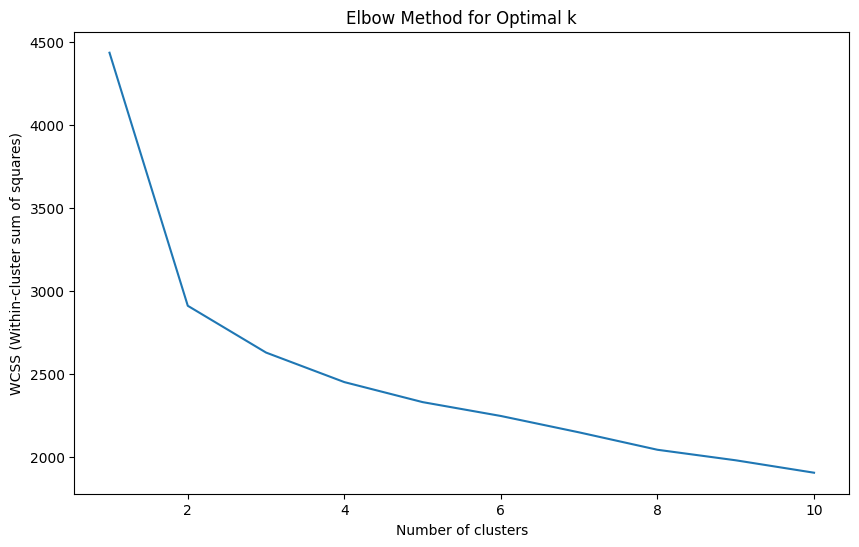

In [31]:
#Choose the number of clusters (k) using the elbow method:

# Elbow method to find optimal k
wcss = []  # To store the within-cluster sum of squares for each k
for k in range(1, 11):  # Trying different values of k (1 to 10)
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_PCA)  # Applying KMeans on the PCA-transformed data
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()


In [32]:
# Apply KMeans with k = 2 (binary classification problem)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_PCA)  # Labels of the clusters


In [33]:
# Silhouette Score
silhouette_avg = silhouette_score(X_PCA, kmeans_labels)
print("Silhouette Score: ", silhouette_avg)

# Davies-Bouldin Index
db_index = davies_bouldin_score(X_PCA, kmeans_labels)
print("Davies-Bouldin Index: ", db_index)

Silhouette Score:  0.3843005551307615
Davies-Bouldin Index:  1.3130900926759745


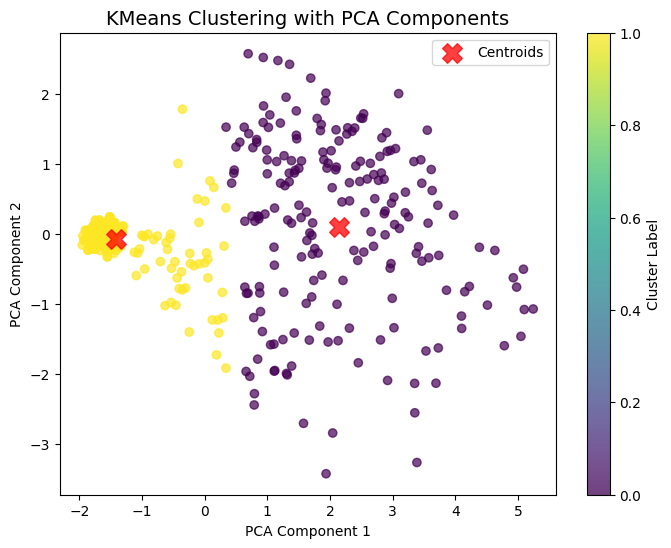

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the PCA-transformed data with KMeans cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=kmeans_labels, cmap='viridis', marker='o', alpha=0.7)
plt.title('KMeans Clustering with PCA Components', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the centroids of the clusters (if needed)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

# Display the plot
plt.legend()
plt.colorbar(label='Cluster Label')
plt.show()


In [35]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=6)  # Adjust eps (neighborhood size) and min_samples based on your dataset
dbscan_labels = dbscan.fit_predict(X_PCA)


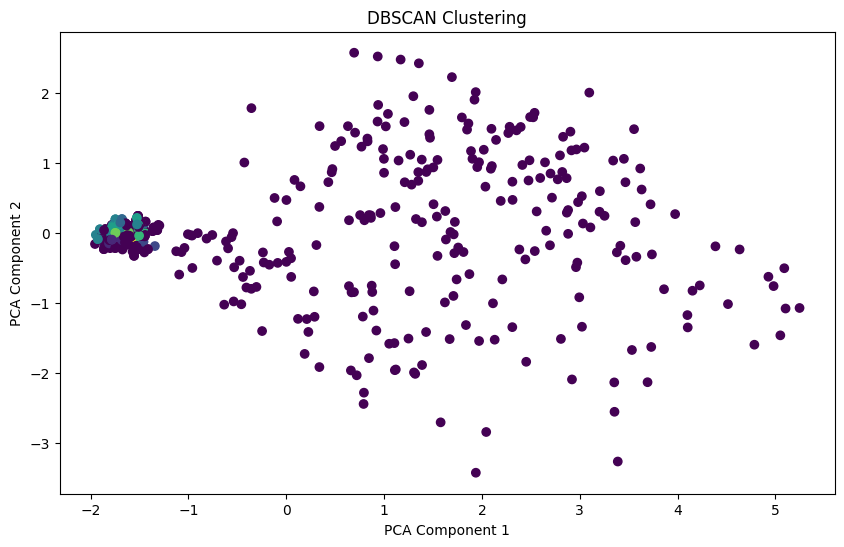

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [37]:
print(f"Number of clusters found: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")
print(f"Number of noise points: {list(dbscan_labels).count(-1)}")


Number of clusters found: 9
Number of noise points: 388


In [38]:
# Silhouette Score (only for valid clusters, not noise points)
if len(set(dbscan_labels)) > 1:
    silhouette_avg_dbscan = silhouette_score(X_PCA, dbscan_labels)
    print("DBSCAN Silhouette Score: ", silhouette_avg_dbscan)
else:
    print("DBSCAN: No valid clusters")

# Davies-Bouldin Index (valid only for clusters, not noise points)
if len(set(dbscan_labels)) > 1:
    db_index_dbscan = davies_bouldin_score(X_PCA, dbscan_labels)
    print("DBSCAN Davies-Bouldin Index: ", db_index_dbscan)
else:
    print("DBSCAN: No valid clusters")


DBSCAN Silhouette Score:  -0.12921167624839758
DBSCAN Davies-Bouldin Index:  1.4151327386449182


#Classifiers to Apply:

1.Logistic Regression (Linear Classifier)

2.K-Nearest Neighbors (KNN) (Non-linear Classifier)

3.Support Vector Classifier (SVC) (Non-linear Classifier)

4.Random Forest (Ensemble Method)

5.AdaBoost (Boosting Algorithm)

In [39]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
# Split the data into training and testing sets
X_PCA #-->X
y     #--> y_ros

,classification
0,0
1,0
2,0
3,0
4,0
...,...
495,1
496,1
497,1
498,1


In [41]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42)

In [42]:
y_train.shape

(400,)

In [43]:
y_test.shape


(100,)

1.Logistic Regression with TTS Method


In [44]:
# 1. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.96      1.00      0.98        54

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

[[44  2]
 [ 0 54]]


2. K-Nearest Neighbors (KNN) with TTS Method

In [45]:
# 2. K-Nearest Neighbors (KNN)
# 2. K-Nearest Neighbors (KNN) with TTS Method
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors (KNN) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.96      1.00      0.98        54

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

[[44  2]
 [ 0 54]]


3. Support Vector Classifier (SVC) with TTS Method

In [46]:
# 3. Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("\nSupport Vector Classifier (SVC) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc)}")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))


Support Vector Classifier (SVC) Performance:
Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.98      1.00      0.99        54

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

[[45  1]
 [ 0 54]]


4. Random Forest Classifier with TTS Method

In [47]:
# 4. Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        54

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[46  0]
 [ 0 54]]


5. AdaBoost Classifier (Boosting Algorithm) with TTS Method

In [48]:
# 5. AdaBoost Classifier (Boosting Algorithm)
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
print("\nAdaBoost Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_adaboost)}")
print(classification_report(y_test, y_pred_adaboost))
print(confusion_matrix(y_test, y_pred_adaboost))


AdaBoost Classifier Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        54

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[46  0]
 [ 0 54]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [50]:
from sklearn.preprocessing import PolynomialFeatures

# Apply PolynomialFeatures to increase the feature space
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # X is the feature set from manual extraction

print(f"Shape after Polynomial Expansion: {X_poly.shape}")


Shape after Polynomial Expansion: (400, 325)


In [51]:
X_poly

array([[ 1., 43., 10., ...,  0.,  0.,  0.],
       [ 1.,  5.,  0., ...,  0.,  0.,  0.],
       [ 1., 63., 10., ...,  0.,  0.,  1.],
       ...,
       [ 1.,  8., 10., ...,  0.,  0.,  0.],
       [ 1., 11.,  1., ...,  0.,  0.,  0.],
       [ 1., 59., 10., ...,  0.,  0.,  0.]])